# Name: Hania Rasheed
# Registration No: B23S0983DS009
# Program: BS DS - 23 (S)
# Date: 11 April, 2025

---


Importing the neccessary libraries.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load a binary image
img = cv2.imread('morphimg.jpg', cv2.IMREAD_GRAYSCALE)



In [7]:
# Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
print("Kernel for Morphological Transformations")
kernel

Kernel for Morphological Transformations


array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

This creates a 5x5 rectangular matrix (kernel) used for morphological operations like erosion, dilation, opening, and closing. It defines the shape and size of the area considered for processing each pixel.

In [8]:
# Function to show results
def show_results(title, images):
    plt.figure(figsize=(12, 3))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'{title} {i}' if i > 0 else 'Original')
        plt.axis('off')
    plt.show()

## Erossion
### Explanation:
cv2.erode() shrinks white regions in a binary image.

It slides the kernel over the image and erodes boundaries of foreground (white) objects.

The iterations parameter defines how many times the erosion is applied.



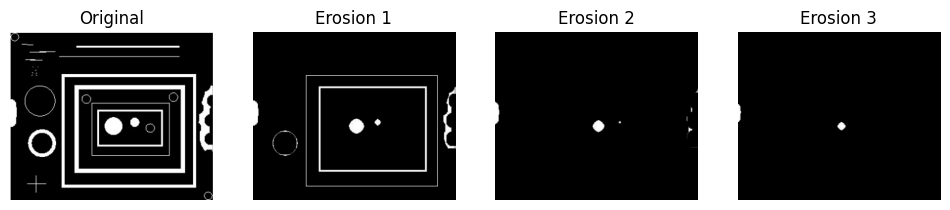

In [9]:
# Erosion
erosion_1 = cv2.erode(img, kernel, iterations=1)
erosion_2 = cv2.erode(img, kernel, iterations=2)
erosion_3 = cv2.erode(img, kernel, iterations=3)
show_results("Erosion", [img, erosion_1, erosion_2, erosion_3])



### Outputs:
erosion_1, erosion_2, erosion_3 are images eroded 1, 2, and 3 times respectively.

As iterations increase:

- White regions shrink more.

- Small noise or thin lines may disappear.

- Gaps and holes in black regions expand.

This is useful for removing small white noise or disconnecting two joined objects

---
## Dilation
### Explanation:
cv2.dilate() expands white regions in a binary image.

It slides the kernel over the image and adds pixels to object boundaries.

The iterations parameter controls how many times dilation is applied.



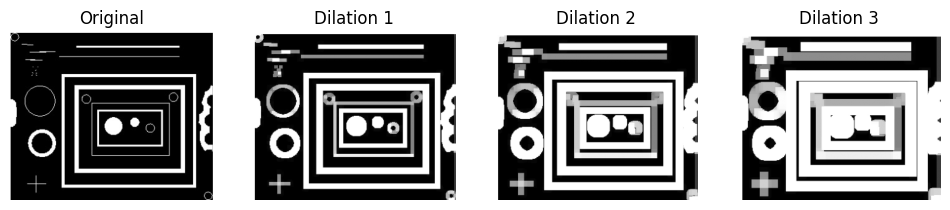

In [10]:
# Dilation
dilation_1 = cv2.dilate(img, kernel, iterations=1)
dilation_2 = cv2.dilate(img, kernel, iterations=2)
dilation_3 = cv2.dilate(img, kernel, iterations=3)
show_results("Dilation", [img, dilation_1, dilation_2, dilation_3])


### Outputs:
dilation_1, dilation_2, dilation_3 are results after applying dilation 1, 2, and 3 times.

As iterations increase:

- White areas grow bigger.

- Small black holes inside white objects may get filled.

- Useful for connecting broken parts of an object.

This operation is often used to highlight or enlarge important regions in an image.

---
## Opening
### Explanation:
- cv2.morphologyEx(..., cv2.MORPH_OPEN, ...) performs Opening, which is Erosion followed by Dilation.

- It removes small white noise or dots while keeping the main shape intact.

- The third parameter (kernel size) defines the size of the structuring element used.



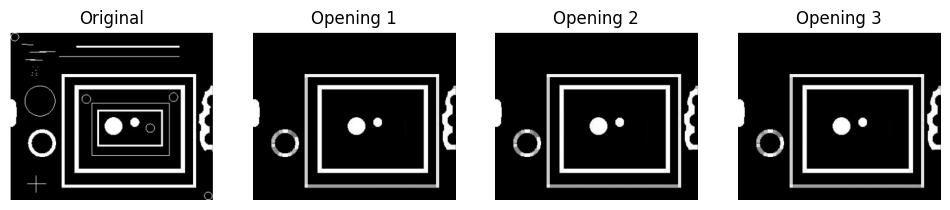

In [11]:
# Opening
open_1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, 3)
open_2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, 7)
open_3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, 21)
show_results("Opening", [img, open_1, open_2, open_3])



### Outputs:
open_1, open_2, open_3 are the results of applying opening with kernel sizes 3x3, 7x7, and 21x21.

- As the kernel size increases:

- More white noise and small objects are removed.

- Larger kernels may also slightly shrink object details.

This is especially useful for cleaning up binary images while preserving the shape of large objects.

---
## Closing
### Explanation:
- cv2.morphologyEx(..., cv2.MORPH_CLOSE, ...) performs Closing, which is Dilation followed by Erosion.

- It fills small black holes or gaps inside white regions without changing the overall shape.

- The last parameter (kernel size) controls how large the closing effect will be.


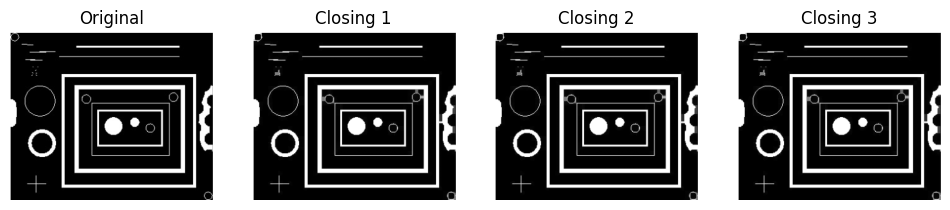

In [12]:
# Closing
close_1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, 3)
close_2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, 7)
close_3 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, 21)
show_results("Closing", [img, close_1, close_2, close_3])

### Outputs:
close_1, close_2, close_3 are the results of applying closing with kernel sizes 3x3, 7x7, and 21x21.

- As the kernel size increases:

- Small black gaps between white areas are closed.

- Larger kernels may also connect nearby objects or smooth rough edges.

Closing is useful for filling in holes or gaps inside objects and connecting broken parts.